In [1]:
import time
import os
import cv2
from matplotlib import pyplot as plt
from skimage import feature
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Load an color image in grayscale
imgs = []
directory = './temp2/'
test_count = len([name for name in os.listdir(directory) if os.path.isfile(directory+name)])

for i in range(1,test_count + 1):
    imgs.append(cv2.imread('./temp2/test'+str(i)+'.JPG'))
    imgs[i-1] = cv2.cvtColor(imgs[i-1], cv2.COLOR_BGR2GRAY)

In [3]:
# Load an color image in grayscale
imgs_1 = []
directory = './temp2/1/'
count_1 = len([name for name in os.listdir(directory) if os.path.isfile(directory+name)])
for i in range(1,count_1+1):
    imgs_1.append(cv2.imread('./temp2/1/'+str(i)+'.PNG'))
    imgs_1[i-1] = cv2.cvtColor(imgs_1[i-1], cv2.COLOR_BGR2GRAY)
directory = './temp2/2/'
count_2 = len([name for name in os.listdir(directory) if os.path.isfile(directory + name)])
imgs_2 = []
for i in range(1,count_2+1):
    imgs_2.append(cv2.imread('./temp2/2/'+str(i)+'.PNG'))
    imgs_2[i-1] = cv2.cvtColor(imgs_2[i-1], cv2.COLOR_BGR2GRAY)
imgs_3 = []
directory = './temp2/3/'
count_3 = len([name for name in os.listdir(directory) if os.path.isfile(directory+name)])

for i in range(1,count_3+1):
    imgs_3.append(cv2.imread('./temp2/3/'+str(i)+'.PNG'))
    imgs_3[i-1] = cv2.cvtColor(imgs_3[i-1], cv2.COLOR_BGR2GRAY)


In [4]:
# import the necessary packages
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        start = time.time()
        #to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="default")
#        lbp = lbp_custom(image)
        print("lbp time", time.time() - start)
        start = time.time()

        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        print("histogram time", time.time() - start)
        start = time.time()
        # normalize the histogram
        
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        print("normalization time", time.time() - start)
        start = time.time()
        return hist

In [13]:
# initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(8, 3)
data = []
labels = []

# loop over the training images
for img in imgs_1:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("1")
	data.append(hist)
for img in imgs_2:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("2")
	data.append(hist)
for img in imgs_3:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("3")
	data.append(hist)


lbp time 0.056882381439208984
histogram time 0.007973909378051758
normalization time 0.0
lbp time 0.051842689514160156
histogram time 0.007979393005371094
normalization time 0.0
lbp time 0.04986977577209473
histogram time 0.011002063751220703
normalization time 0.0
lbp time 0.04687142372131348
histogram time 0.008979082107543945
normalization time 0.0
lbp time 0.05904078483581543
histogram time 0.00998067855834961
normalization time 0.0
lbp time 0.05337214469909668
histogram time 0.009998321533203125
normalization time 0.0
lbp time 0.03987479209899902
histogram time 0.007978677749633789
normalization time 0.0
lbp time 0.05632972717285156
histogram time 0.010972261428833008
normalization time 0.0
lbp time 0.011967658996582031
histogram time 0.0029914379119873047
normalization time 0.0
lbp time 0.04242444038391113
histogram time 0.007977485656738281
normalization time 0.0
lbp time 0.048706769943237305
histogram time 0.005972146987915039
normalization time 0.0
lbp time 0.00701570510864257

In [14]:
# train a Linear SVM on the data
start_time = time.time()
# model = LinearSVC(random_state = 0)
# model.fit(data, labels)

model = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
model.fit(data, labels)
end_time = time.time()
print(end_time - start_time)

0.004988193511962891


lbp time 0.05089402198791504
histogram time 0.009953737258911133
normalization time 0.0


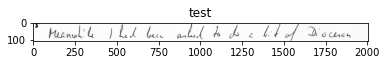

lbp time 0.06439828872680664
histogram time 0.010938644409179688
normalization time 0.0


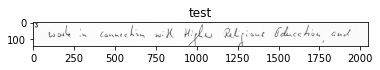

lbp time 0.06468629837036133
histogram time 0.011004447937011719
normalization time 0.0


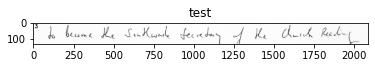

lbp time 0.047910451889038086
histogram time 0.0079193115234375
normalization time 0.0


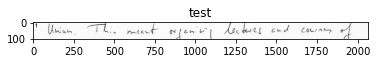

lbp time 0.07981753349304199
histogram time 0.015928983688354492
normalization time 0.0


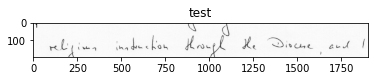

lbp time 0.06282281875610352
histogram time 0.008975028991699219
normalization time 0.0


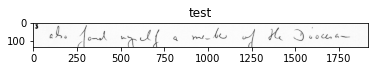

lbp time 0.06582355499267578
histogram time 0.011968612670898438
normalization time 0.0


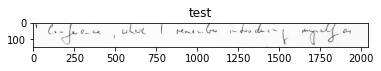

lbp time 0.07383489608764648
histogram time 0.01392984390258789
normalization time 0.0


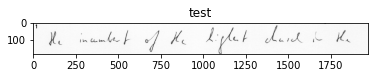

lbp time 0.00997304916381836
histogram time 0.0019915103912353516
normalization time 0.0


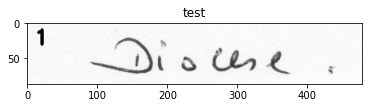

In [15]:
# loop over the testing images
for image in imgs:
    hist = desc.describe(image)
    prediction = model.predict(hist.reshape(1, -1))
    # display the image and the prediction
    cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 0, 255), 3)
    plt.imshow(image,cmap='Greys_r')
    plt.title('test')
    plt.show()

In [8]:
from multiprocessing import Pool
img_lbp = 0
def lbp(i):
    global img_lbp
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(image, i, j) 

def lbp_custom(image):
    global img_lbp
    height, width = image.shape 
    img_lbp = np.zeros((height, width), 
                   np.uint8)
    pool = Pool(os.cpu_count())
    pool.map(lbp, range(0, height))
    pool.join()
    pool.close()
    return img_lbp



In [9]:

      
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value 
   
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y, r = 3): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-r, y-r)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-r, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-r, y + r)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + r)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + r, y + r)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + r, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + r, y-r)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-r)) 
       
    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 